<a href="https://colab.research.google.com/github/Kotomiya07/animagine-xl3.0-colab/blob/main/ANIMAGINE_XL3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [ ]:
!pip install -q diffusers --upgrade
!pip install -q transformers accelerate safetensors

# **Load Model**

In [ ]:
import torch
from diffusers import (
    StableDiffusionXLPipeline,
    EulerAncestralDiscreteScheduler,
    AutoencoderKL
)

# Load VAE component
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

# Configure the pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "cagliostrolab/animagine-xl-3.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.26.0",
  "_name_or_path": "cagliostrolab/animagine-xl-3.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# **Generate**

  0%|          | 0/28 [00:00<?, ?it/s]

(-0.5, 831.5, 1343.5, -0.5)

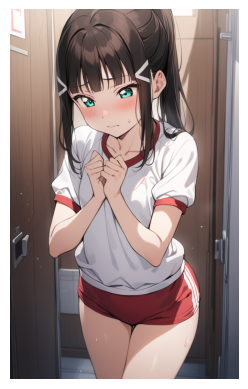

In [ ]:
# @title Set Param
chara_name = "1girl, kurosawa dia, love live!" # @param {type:"string"}
details = "(gym uniform,red buruma, white shirt, short sleeves, thighs:1.3), indoors, locker room,depth of field, ponytail, black hair,(ribbon:1.2), (embarrassed,blush:1.3)" # @param {type:"string"}
quality = "masterpiece, best quality" # @param {type:"string"}
ops_apply = False # @param {type:"boolean"}
linear_ops = "monochrome, lineart greyscale, simple background," # @param {type:"string"}
negative_prompt = "Worst Quality, Low Quality, blush, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, normal quality, jpeg artifacts, signature, watermark, username, blurry, multiple legs, multiple hands, incorrect limb and crotch, less than surrealism, fused fusion, long body, mutated breasts, bad perspective, text, logo" # @param {type:"string"}
import matplotlib.pyplot as plt
from PIL import Image

prompt = chara_name + ", " + details + ", " + quality

if ops_apply:
  prompt = prompt + ", " + linear_ops

SEED = 8107727106147728 # @param {type:"integer"}
is_manual_seed = False # @param {type:"boolean"}
size = "832 x 1216" # @param ["1024 x 1024", "1152 x 896", "896 x 1152", "1216 x 832", "832 x 1216", "1344 x 768", "768 x 1344", "1536 x 640", "640 x 1536"]
width, height = map(int, size.split(" x "))

num_images = 1 # @param ["1", "2", "4", "6"] {type:"raw"}

generator = torch.Generator('cuda')
# シード値固定
if is_manual_seed:
  generator.manual_seed(SEED)
else:
  generator.seed()

import datetime


images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    guidance_scale=6,
    target_size=(width,height),
    original_size=(width*4,height*4),
    num_inference_steps=28,
    generator=generator,
    num_images_per_prompt=num_images
).images

for image in images:
  date = datetime.datetime.now()
  output = f"/content/{date}_{generator.initial_seed()}_anime_girl.png"
  image.save(output)
  image = Image.open(output)

from mpl_toolkits.axes_grid1 import ImageGrid

# 列数
ncols = 2

# 行数
nimg = len(images)
nrows = nimg // ncols if nimg % ncols == 0 else nimg // ncols + 1

fig = plt.figure(figsize=(11,11))

# ImageGridインスタンスの作成
grid = ImageGrid(fig, 111,
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.2)

# 画像を貼り込む
for ax, img in zip(grid, images):
    ax.imshow(img)

# 軸を消す
for ax in grid.axes_all:
    ax.axis('off')

plt.show()


# **Clean Memory**

In [ ]:
import gc

if "pipe" in globals():
    del pipe
if "image" in globals():
    del image
torch.cuda.empty_cache()
gc.collect()